# Customer Segmentation

# 1.Import data

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('dataset.xlsx')
df.head()

,Unnamed: 0,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,...,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score
0,3853,eb959517b2fb80c1618cea5160656f2d,9cfcb63cf9bc63b557eeddf25980d918,NaN,NaN,executive,asap,2010-12-31 17:57:55,-12.022614,-77.108337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,iPhone,NaN,NaN
1,19713,eb959517b2fb80c1618cea5160c574d7,8040d18580251e7b8b9073260793ecd1,c814db2127582cf95dea1f74f43127c2,16cbe35db7fff70fbc8251b4cdca8eb8,executive,asap,2010-12-31 17:30:20,-12.027391,-77.106556,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,Android,NaN,NaN
2,21767,29c460e9d44ae084d4631c5adeba2548,3d68e1172f35c1fbd06db5a1bc1425d0,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,asap,2010-12-31 17:22:11,-12.085149,-76.977739,...,2828.0,43.0,8836.0,51.0,0.0,0.0,0.0,Android,NaN,5.0
3,19718,29c460e9d44ae084d4631c5ade06f5b4,a7b047c6a09ccb85e9980d80ffaaba51,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,2010-12-31 16:36:49,-12.100601,-77.008026,...,2356.0,51.0,7363.0,61.0,1805.0,1767.0,38.0,iPhone,5.0,4.0
4,21768,29c460e9d44ae084d4631c5adeba892a,fa88b809b28e4387f72703c52ae49bb7,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,2010-12-31 15:54:44,-12.126499,-77.003082,...,2246.0,0.0,7019.0,0.0,1685.0,1685.0,0.0,iPhone,5.0,4.0


# 1. Remove empty or 0 values

In [30]:
# Remove end_state with 'driver_cancel', 'failure', 'no show', 'not found', 'rider cancel'

end_state_remove = ['driver_cancel', 'failure', 'no show', 'not found', 'rider cancel', 'driver cancel']
df = df.loc[~df['end_state'].isin(end_state_remove)]

# Remove price with 0 or empty values
df = df[df['price'] != 0]
df = df[df.price.notnull()]

In [31]:
import datetime as dt
# Crear función que trunca un objeto de fecha dado el primer día del mes
def get_month(x): return dt.datetime(x.year, x.month, 1) 

#Aplicar función a columna start_at y crear columna start_at_month
df['start_at_month'] = df['start_at'].apply(get_month)

# Agrupar por user_id y seleccionar valores de start_at_month
grouping = df.groupby('user_id')['start_at_month']

# Usar transform() junto con min() para asignar el menor valor de start_at_month a cada cliente
# CohortMonth es el mes de la más reciente adquisición del cliente
df['cohort_month'] = grouping.transform('min')

# Revisar los 5 primeras columnas
df.head()

,Unnamed: 0,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,...,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score,start_at_month,cohort_month
2,21767,29c460e9d44ae084d4631c5adeba2548,3d68e1172f35c1fbd06db5a1bc1425d0,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,asap,2010-12-31 17:22:11,-12.085149,-76.977739,...,8836.0,51.0,0.0,0.0,0.0,Android,NaN,5.0,2010-12-01,2010-05-01
3,19718,29c460e9d44ae084d4631c5ade06f5b4,a7b047c6a09ccb85e9980d80ffaaba51,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,2010-12-31 16:36:49,-12.100601,-77.008026,...,7363.0,61.0,1805.0,1767.0,38.0,iPhone,5.0,4.0,2010-12-01,2010-01-01
4,21768,29c460e9d44ae084d4631c5adeba892a,fa88b809b28e4387f72703c52ae49bb7,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,2010-12-31 15:54:44,-12.126499,-77.003082,...,7019.0,0.0,1685.0,1685.0,0.0,iPhone,5.0,4.0,2010-12-01,2010-07-01
5,10290,29c460e9d44ae084d4631c5ade0713f4,a37ccff55ca3cff97b19b45ab2d89839,40187316352d2c03ddc19e9c8ad7c514,42aa958edf790ef3d45823386fb734ea,executive,asap,2010-12-31 15:49:39,-12.124153,-76.994110,...,1698.0,382.0,1450.0,408.0,236.0,iPhone,5.0,5.0,2010-12-01,2010-11-01
6,3942,eb959517b2fb80c1618cea5160662091,d439fbb315b2966b8c84e219ec56ca88,62c2e39787aa19cd2513901cf3b4858d,62c2e39787aa19cd2513901cf3b49643,executive,reserved,2010-12-31 15:40:00,-12.020939,-77.107483,...,21020.0,321.0,4958.0,4759.0,199.0,iPhone,NaN,5.0,2010-12-01,2010-12-01


In [32]:
# Calcular el desplazamiento de tiempo
# Crear una función para extraer valores enteros en años, meses y días
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Calcular el número de meses entre la primera y última transacción/adquisición por cada cliente
invoice_year, invoice_month, _ = get_date_int(df, 'start_at_month')
cohort_year, cohort_month, _ = get_date_int(df, 'cohort_month')

# Calcular la diferencia en años
years_diff = invoice_year - cohort_year

# Calcular la diferencia en meses
months_diff = invoice_month - cohort_month

# Convertir CohortMonth a formate 'date'
df['cohort_month'] = pd.to_datetime(df['cohort_month']).dt.date

# Extraer la diferencia en meses desde la primera transacción/adquisión por cliente
df['cohort_index'] = years_diff * 12 + months_diff
df.head()

,Unnamed: 0,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,...,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score,start_at_month,cohort_month,cohort_index
2,21767,29c460e9d44ae084d4631c5adeba2548,3d68e1172f35c1fbd06db5a1bc1425d0,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,asap,2010-12-31 17:22:11,-12.085149,-76.977739,...,51.0,0.0,0.0,0.0,Android,NaN,5.0,2010-12-01,2010-05-01,7
3,19718,29c460e9d44ae084d4631c5ade06f5b4,a7b047c6a09ccb85e9980d80ffaaba51,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,2010-12-31 16:36:49,-12.100601,-77.008026,...,61.0,1805.0,1767.0,38.0,iPhone,5.0,4.0,2010-12-01,2010-01-01,11
4,21768,29c460e9d44ae084d4631c5adeba892a,fa88b809b28e4387f72703c52ae49bb7,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,2010-12-31 15:54:44,-12.126499,-77.003082,...,0.0,1685.0,1685.0,0.0,iPhone,5.0,4.0,2010-12-01,2010-07-01,5
5,10290,29c460e9d44ae084d4631c5ade0713f4,a37ccff55ca3cff97b19b45ab2d89839,40187316352d2c03ddc19e9c8ad7c514,42aa958edf790ef3d45823386fb734ea,executive,asap,2010-12-31 15:49:39,-12.124153,-76.994110,...,382.0,1450.0,408.0,236.0,iPhone,5.0,5.0,2010-12-01,2010-11-01,1
6,3942,eb959517b2fb80c1618cea5160662091,d439fbb315b2966b8c84e219ec56ca88,62c2e39787aa19cd2513901cf3b4858d,62c2e39787aa19cd2513901cf3b49643,executive,reserved,2010-12-31 15:40:00,-12.020939,-77.107483,...,321.0,4958.0,4759.0,199.0,iPhone,NaN,5.0,2010-12-01,2010-12-01,0


# Definir métricas comerciales

1. Retención de clientes = % de clientes que volvieron en los siguientes períodos (clientes activos)
2. Cantidad de transacciones/adquisiones promedio por período de tiempo
3. Valor de gasto promedio por período de tiempo

In [33]:
# Crear DataFrame grouping para agrupar datos basados en CohortMonth y CohortIndex
grouping = df.groupby(['cohort_month', 'cohort_index'])

# Contar el número de valores únicos por CustomerID
cohort_data = grouping['user_id'].apply(pd.Series.nunique).reset_index()

# Crear tabla pivote
cohort_counts = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='user_id')
cohort_counts

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
2009-12-01,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0
2010-01-01,88.0,50.0,42.0,46.0,36.0,41.0,36.0,40.0,45.0,47.0,45.0,42.0,NaN
2010-02-01,51.0,18.0,22.0,18.0,14.0,21.0,20.0,19.0,17.0,15.0,19.0,NaN,NaN
2010-03-01,78.0,38.0,27.0,28.0,27.0,25.0,23.0,26.0,23.0,25.0,NaN,NaN,NaN
2010-04-01,120.0,47.0,41.0,28.0,38.0,33.0,26.0,32.0,32.0,NaN,NaN,NaN,NaN
2010-05-01,111.0,57.0,34.0,38.0,35.0,34.0,30.0,33.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,93.0,49.0,35.0,31.0,25.0,26.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,101.0,52.0,38.0,39.0,37.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,98.0,34.0,31.0,30.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Seleccionar la primera columna y guardarlo como cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Dividir cohort_counts por cohort_sizes en todas las filas
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3)*100

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
2009-12-01,100.0,100.0,100.0,100.0,50.0,100.0,50.0,50.0,50.0,100.0,100.0,50.0,50.0
2010-01-01,100.0,56.8,47.7,52.3,40.9,46.6,40.9,45.5,51.1,53.4,51.1,47.7,NaN
2010-02-01,100.0,35.3,43.1,35.3,27.5,41.2,39.2,37.3,33.3,29.4,37.3,NaN,NaN
2010-03-01,100.0,48.7,34.6,35.9,34.6,32.1,29.5,33.3,29.5,32.1,NaN,NaN,NaN
2010-04-01,100.0,39.2,34.2,23.3,31.7,27.5,21.7,26.7,26.7,NaN,NaN,NaN,NaN
2010-05-01,100.0,51.4,30.6,34.2,31.5,30.6,27.0,29.7,NaN,NaN,NaN,NaN,NaN
2010-06-01,100.0,52.7,37.6,33.3,26.9,28.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,51.5,37.6,38.6,36.6,40.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,34.7,31.6,30.6,32.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


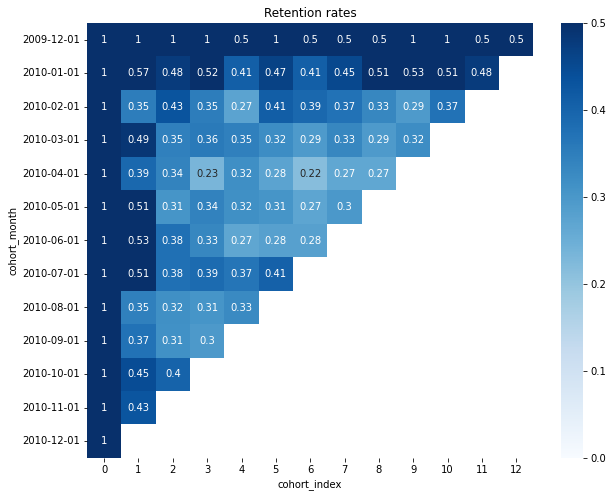

In [35]:
# Visualizar las tasas de retención como un mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('Retention rates')
sns.heatmap(data = retention,
            annot = True,
            vmin = 0.0,
            vmax = 0.5,
            cmap = 'Blues')
plt.show()

# RFM Segmentation (Recency, Frequency and Monetary)

Segmentación de conducta de cliente basado en 03 métricas:

- Recency: Mide la cantidad de días que han pasado desde la última compra que hizo el cliente durante los últimos 12 meses.
- Frequency: Mide la cantidad acumulada de las veces que el cliente compró durante los últimos 12 meses.
- MonetaryValue: Mide la cantidad acumulada de dinero que el cliente ha gasto en nuestros productos en los últimos 12 meses.

In [36]:
# Crear snapshot_date para seleccionar la fecha más reciente de todo el dataset, sumar 1 para simular que es el día que hacemos el análisis
snapshot_date = max(df.start_at) + dt.timedelta(days=1)

# Agrupar los datos por user_id
datamart = df.groupby(['user_id']).agg({
    'start_at': lambda x: (snapshot_date - x.max()).days, # Fecha del día del análisis - Fecha del start_at más reciente por cliente
    'journey_id': 'count',
    'price': 'sum'})

# Renombar columnas para una fácil interpretación
datamart.rename(columns = {'start_at': 'Recency',
                            'journey_id': 'Frequency',
                            'price': 'MonetaryValue'}, inplace=True)

# Datamart es una tabla donde las filas son cada cliente con su antiguedad, frecuencia y valor monetario al día de hoy.            
datamart.head()

,Recency,Frequency,MonetaryValue
user_id,,,
00cb8ad6a0f7214d002e3ded6b7c9b80,123,7,31587.0
00cb8ad6a0f7214d002e3ded6b7de012,101,5,14056.0
00cb8ad6a0f7214d002e3ded6b7eb91b,317,1,5368.0
0194b4a5c9e41bfd35f9168423fa2857,137,23,50935.0
0221e01fd79a9e76808595048df20efd,13,15,59668.0


# Supuestos claves de k-means clustering respecto a las variables (R/F/M)

1. Las variables deben tener distribuciones simétricas (Las variables sesgadas se gestionan con transformación logarítmica)
2. Las variables deben tener el mismo promedio (Para garantizar que se asigne la misma importancia a cada variable)
3. Las varialbes deben tener la misma varianza (Para garantizar que se asigne la misma importancia a cada variable)

## 3.1. Explorar datos para k-means clustering

Pasos

1. Explorar variables con distribuciones asimétricas - aplicarles transformación logarítimica
2. Normalizar/Estandarizar las variables con el mismo promedio
3. Normalizar/Estandarizar las variables con la misma varianza
4. Almacenar como un 'array' separado para ser usado posteriormente para el clustering

In [37]:
# Filtrar columnas CustomerID, Recency, Frequency, MonetaryValue en un nuevo DataFrame
datamart_rfm = datamart[['Recency', 'Frequency', 'MonetaryValue']]
datamart_rfm.describe()

,Recency,Frequency,MonetaryValue
count,1217.000000,1217.000000,1.217000e+03
mean,88.062449,14.284306,5.095065e+04
std,91.968759,39.010875,1.564963e+05
min,1.000000,1.000000,1.300000e+03
25%,13.000000,1.000000,4.870000e+03
50%,47.000000,3.000000,1.254000e+04
75%,138.000000,11.000000,3.800500e+04
max,364.000000,446.000000,3.674821e+06


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

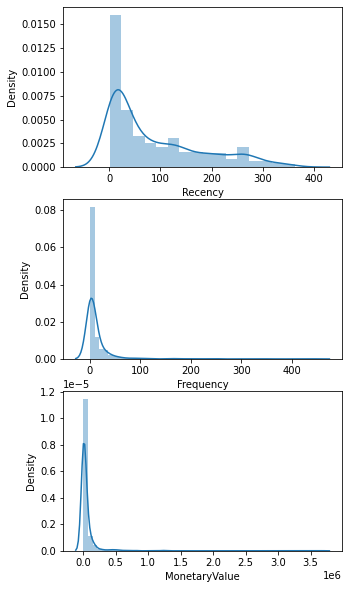

In [38]:
# Graficar la distribución de las columnas Recency, Frequency y MonetaryValue
plt.figure(figsize=(5,10))
plt.subplot(3, 1, 1)
sns.distplot(datamart_rfm['Recency'])
plt.subplot(3, 1, 2)
sns.distplot(datamart_rfm['Frequency'])
plt.subplot(3, 1, 3)
sns.distplot(datamart_rfm['MonetaryValue'])

# Presentar gráfico
plt.show()

In [39]:
# Las gráficas nos sugieren que las variables tiene un amplio rango de valores
# Aplicaremos la transformación logarítmica para eliminar, en la medida de lo posible, los sesgos
datamart_rfm_log = np.log(datamart_rfm)
datamart_rfm_log.describe()

,Recency,Frequency,MonetaryValue
count,1217.000000,1217.000000,1217.000000
mean,3.714110,1.433896,9.605137
std,1.428372,1.399261,1.455350
min,0.000000,0.000000,7.170120
25%,2.564949,0.000000,8.490849
50%,3.850148,1.098612,9.436679
75%,4.927254,2.397895,10.545473
max,5.897154,6.100319,15.117015


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

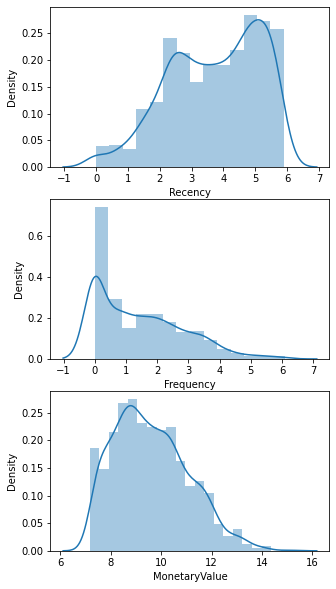

In [40]:
# Graficar la distribución con transformación logarítmica de las columnas Recency, Frequency y MonetaryValue
plt.figure(figsize=(5,10))
plt.subplot(3, 1, 1)
sns.distplot(datamart_rfm_log['Recency'])
plt.subplot(3, 1, 2)
sns.distplot(datamart_rfm_log['Frequency'])
plt.subplot(3, 1, 3)
sns.distplot(datamart_rfm_log['MonetaryValue'])

# Presentar gráfico
plt.show()

In [41]:
# Inicializar una escala de normalización
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Ajustar la escala de normalización
scaler.fit(datamart_rfm_log)

# Normalizar y centrar la data
datamart_rfm_normalized = scaler.transform(datamart_rfm_log)

# Crear un DataFrame con valores de variables normalizados
datamart_rfm_normalized = pd.DataFrame(datamart_rfm_normalized,
 index=datamart_rfm_log.index, columns=datamart_rfm_log.columns)

# Resumen estadístico de nuevo DataFrame
datamart_rfm_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,1217.00,1217.00,1217.00
mean,-0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-2.60,-1.03,-1.67
25%,-0.80,-1.03,-0.77
50%,0.10,-0.24,-0.12
75%,0.85,0.69,0.65
max,1.53,3.34,3.79


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

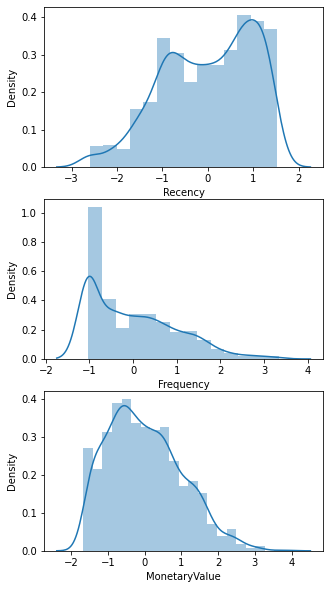

In [42]:
# Graficar la distribución con transformación de normalización de las columnas Recency, Frequency y MonetaryValue
plt.figure(figsize=(5,10))
plt.subplot(3, 1, 1)
sns.distplot(datamart_rfm_normalized['Recency'])
plt.subplot(3, 1, 2)
sns.distplot(datamart_rfm_normalized['Frequency'])
plt.subplot(3, 1, 3)
sns.distplot(datamart_rfm_normalized['MonetaryValue'])

# Presentar gráfico
plt.show()

# Definir el número óptimo de clusterings

Mediante el método 'Elbow criterion': Fácil de interpretar y brinda una buena estimación

Pasos

- Graficar el número de clusters contra la suma de errores al cuadrado (SSE) dentro del cluster.
- Identificar el "codo" en el gráfico: Punto donde disminuye la disminución de SSE y se vuelve algo marginal.
- Definir el punto "codo" como k-means

(*)SSE: Suma de distancias al cuadrado desde cada punto de datos hasta su centro de clúster.

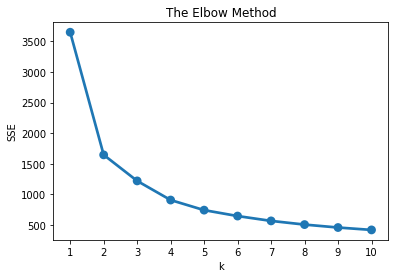

In [43]:
# Importar librerías
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

# Entrenar el KMeans y calcular el SSE para cada *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(datamart_rfm_normalized)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center

# Graficar SSE para cada *k*
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

# Ejecutar el K-Means clustering

- El gráfico The Elbow Method nos sugiere que los números óptimos de clustering son 2 y 3.
- En esta ocasión, escogeré k-means=3 para una mejor flexibilidad en las estrategias comerciales.

In [44]:
# El gráfico The Elbow Method nos sugiere que 
# los números óptimos de clustering son 2 y 3.

# En esta ocasión, escogeré k-means=3 para 
# una mejor flexibilidad en las estrategias comerciales
# y para incrementar la información en el resumen estadístico.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=1)

# Calcular el k-means clustering sobre la data pre-procesada
kmeans.fit(datamart_rfm_normalized)

# Extraer etiquetas de cluster desde el atributo labels_
cluster_labels = kmeans.labels_

# Analizar y visualizar resultados

Enfoques para construir perfiles de clientes:

1. Resúmenes estadísticos para cada clúster
- Ejecutar la segmentación de k-means para varios valores de k alrededor del valor recomendado
- Crear una columna de etiqueta de cluster en el datamart_rfm
- Comparar los valores promedio de RFM de cada solución de agrupamiento
2. Snake plots
3. Importancia relativa de los atributos del segmento en la comparación con la población

# Resúmenes estadísticos para cada clúster

In [45]:
# Crear una columna de etiquetas de clúster en datamart_rfm
datamart_rfm_k3 = datamart_rfm.assign(Cluster = cluster_labels)

# Calcular el promedio de los valores RFM
# y la cantidad de clientes por cada cluster
datamart_rfm_k3.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         148.0       2.0        5816.0   552
1          21.0      57.0      199674.0   242
2          49.0       7.0       24764.0   423

# Snake Plots

In [46]:
# Preparar la data para el snake plot
# Transformar datamart_normalized como DataFrame y agregar una columna 'Cluster'
datamart_rfm_normalized = pd.DataFrame(datamart_rfm_normalized,
                                    index=datamart_rfm.index,
                                    columns=datamart_rfm.columns)
datamart_rfm_normalized['Cluster'] = datamart_rfm_k3['Cluster']

# Moldear los datos en un formato largo para que los valores RFM
#  y los nombres de las métricas se almacenan en una sóla columna
datamart_melt = pd.melt(datamart_rfm_normalized.reset_index(),
                        # Asignar CustomerID y Cluster como varialbles ID
                        id_vars=['user_id', 'Cluster'],
                        # Asignar RFM_Values como value_vars
                        value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                        var_name='Attribute',
                        value_name='Value')
datamart_melt

,user_id,Cluster,Attribute,Value
0,00cb8ad6a0f7214d002e3ded6b7c9b80,2,Recency,0.769075
1,00cb8ad6a0f7214d002e3ded6b7de012,2,Recency,0.631054
2,00cb8ad6a0f7214d002e3ded6b7eb91b,0,Recency,1.432142
3,0194b4a5c9e41bfd35f9168423fa2857,2,Recency,0.844574
4,0221e01fd79a9e76808595048df20efd,1,Recency,-0.804856
...,...,...,...,...
3646,ff1cb10b9edf79369742a37ce5d8d6f6,0,MonetaryValue,-1.489432
3647,ff5c924e0b630fd7c019a4234053c385,0,MonetaryValue,-0.829353
3648,ff5c924e0b630fd7c019a42340593ee2,0,MonetaryValue,-1.489432
3649,ff5c924e0b630fd7c019a42340594b55,1,MonetaryValue,1.093020


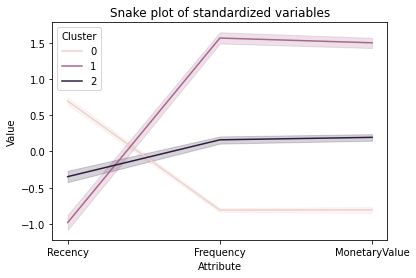

In [47]:
# Graficar el snake plot
plt.title('Snake plot of standardized variables')
sns.lineplot(x='Attribute', y='Value', hue='Cluster',
            data=datamart_melt)

# Presentar gráfico
plt.show()

# Importancia relativa de atributos de segmentos

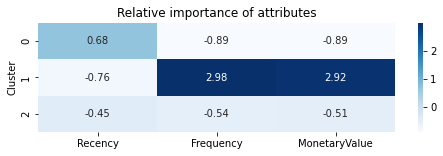

In [48]:
# Calcular los valores promedio de RFM para cada Cluster de clientes
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean()

# Calculate los valores promedio de RFM para la población total de clientes
population_avg = datamart_rfm.mean()

# Calcular la importancia relativa del valor del atributo del cluster 
# en comparación con la población
relative_imp = cluster_avg / population_avg - 1

# Imprimir puntajes de importancia relativa redondeados a 2 decimales
relative_imp.round(2)

# Graficar el heatmap
plt.figure(figsize=(8, 2))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='Blues')

# Presentar el gráfico
plt.show()